<a href="https://colab.research.google.com/github/AlexanderSychev2005/Sleep-Analysis-EDA-ML/blob/main/sleep_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sleep Analysis / Hypothesises

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sleep-health-and-lifestyle-dataset


## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
dataset = pd.read_csv(f"{path}/Sleep_health_and_lifestyle_dataset.csv")

## Dataset Columns:

1. Person ID: An identifier for each individual.
2. Gender: The gender of the person (Male/Female).
3. Age: The age of the person in years.
4. Occupation: The occupation or profession of the person.
5. Sleep Duration (hours): The number of hours the person sleeps per day.
6. Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
7. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8. Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9. BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
13. Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## Details about Sleep Disorder Column:

*   None: The individual does not exhibit any specific sleep disorder.
*   Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
* Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.


In [6]:
dataset = dataset.fillna("None")

In [7]:
dataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## EDA (Exploratory analysis)

In [8]:
print(f"Dataset shape {dataset.shape}")

Dataset shape (374, 13)


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [10]:
dataset.describe().style.background_gradient(cmap='Blues')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [11]:
dataset.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


In [12]:
number_of_values = dataset.nunique()
print(number_of_values)

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64


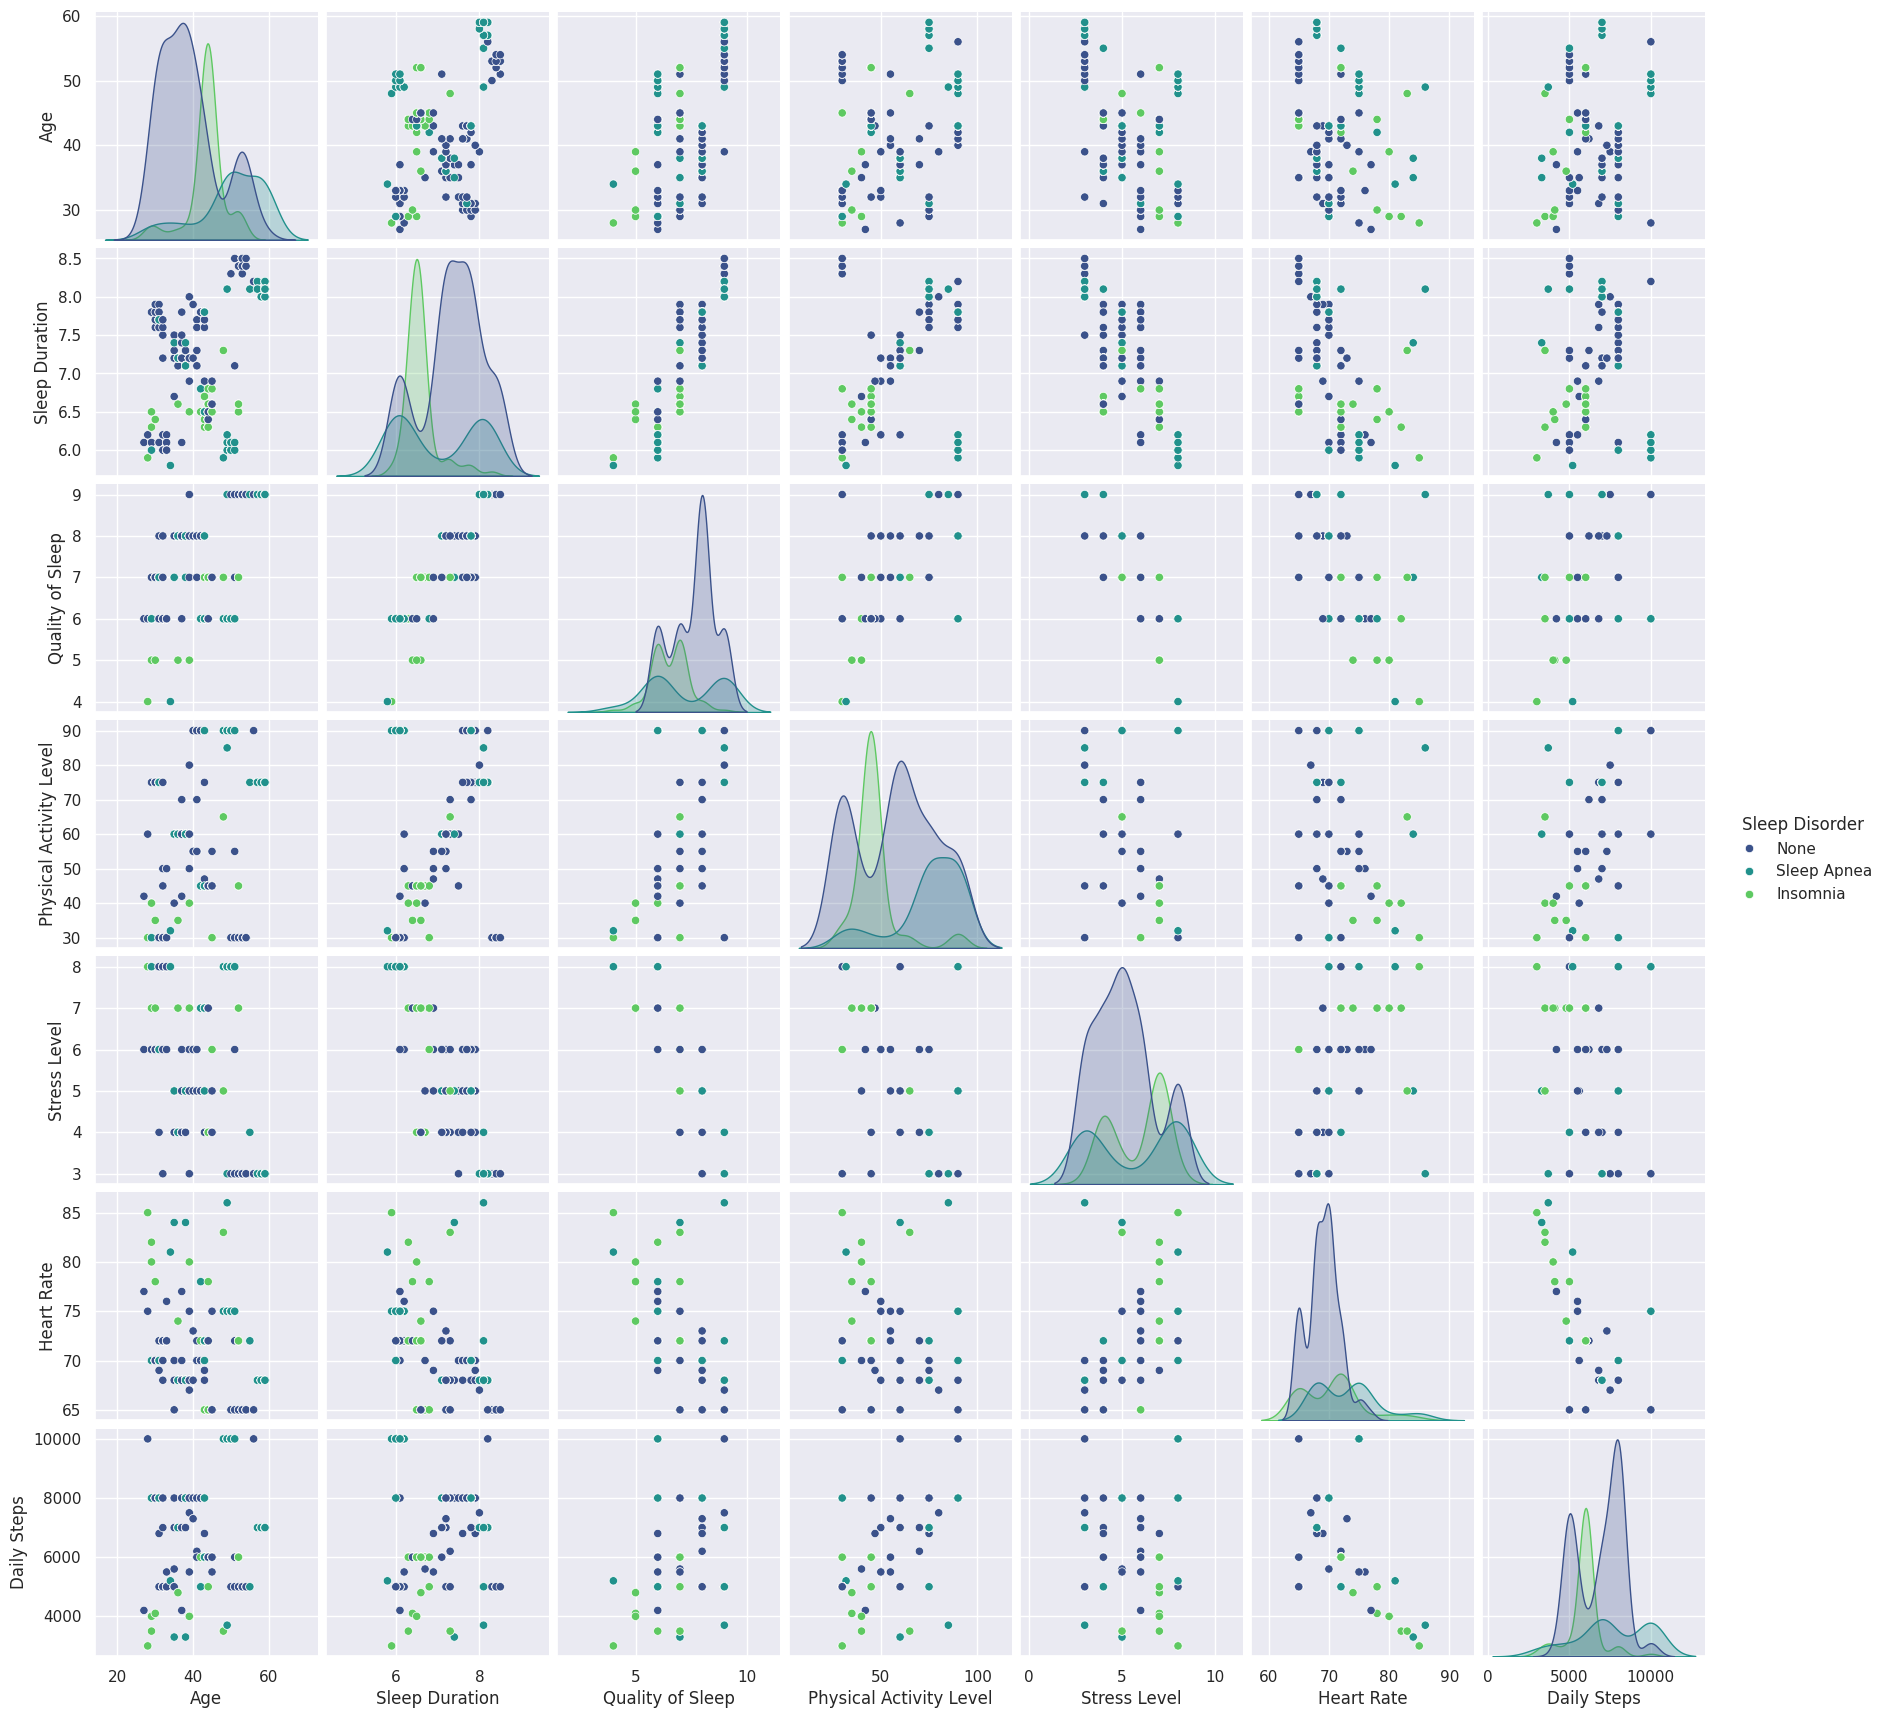

In [13]:
sns.pairplot(data=dataset.drop('Person ID', axis=1), hue='Sleep Disorder', palette="viridis")

### Check for NaNs

In [14]:
null_col = dataset.isna().sum()
print(null_col)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [15]:
null_col = dataset.isna().mean() * 100
print(null_col)

Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64


### Sleep Duration

#### Sleep Duration (hours)

<Axes: xlabel='Sleep Duration', ylabel='Count'>

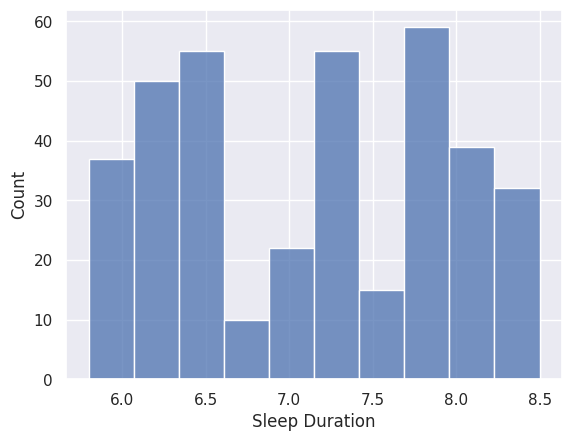

In [16]:
sns.histplot(dataset['Sleep Duration'])

<Axes: xlabel='Sleep Duration', ylabel='Count'>

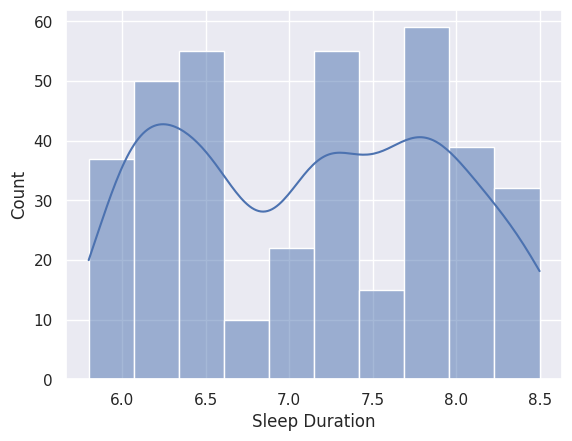

In [17]:
sns.histplot(dataset['Sleep Duration'], kde=True)

#### Sleep Duration (hours) by Gender

<Axes: xlabel='Gender', ylabel='Sleep Duration'>

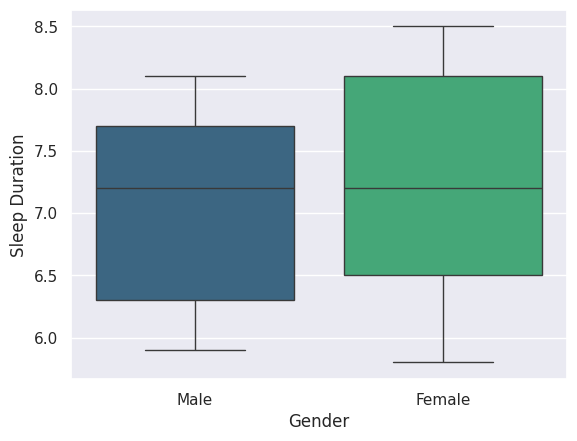

In [21]:
sns.boxplot(data=dataset, y='Sleep Duration', x='Gender', palette='viridis')

#### KDE

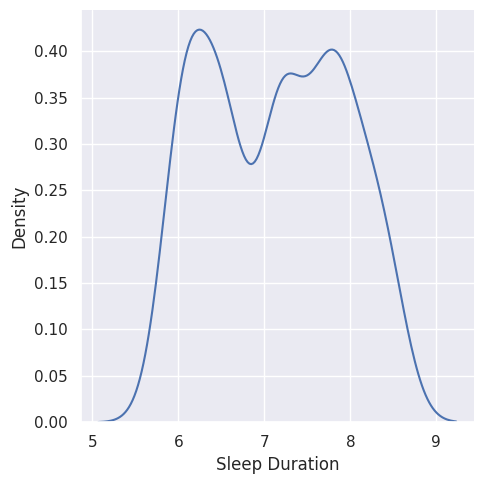

In [22]:
sns.displot(kind='kde',
           data=dataset,
           x='Sleep Duration')
plt.show()

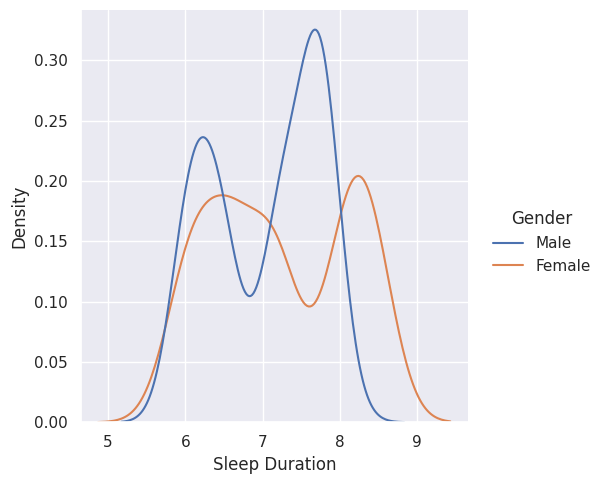

In [23]:
sns.displot(kind='kde',
           data=dataset,
           x='Sleep Duration', hue='Gender')
plt.show()

#### Q-Q plot

In [ ]:
from scipy.stats import probplot

In [ ]:
sleep_duration = dataset['Sleep Duration']

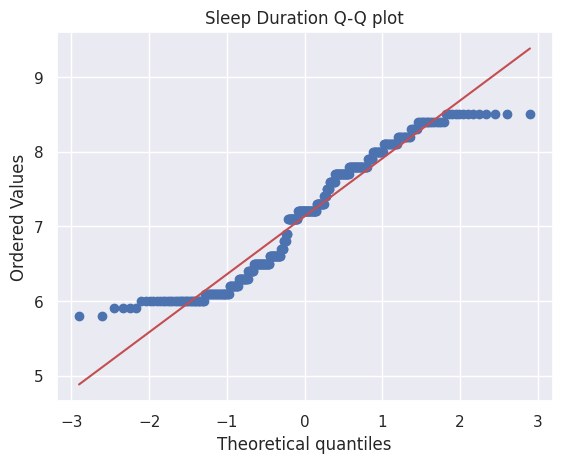

In [ ]:
probplot(sleep_duration, dist="norm", plot=plt)
plt.title("Sleep Duration Q-Q plot")
plt.show()

#### Sleep Duration / Sleep Disorder

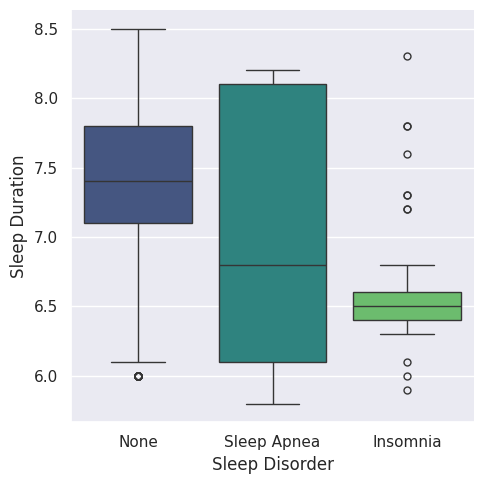

In [26]:
sns.catplot(kind='box', data=dataset, y='Sleep Duration', x='Sleep Disorder', palette="viridis")

#### Sleep Duration / BMI Category

<Axes: xlabel='Sleep Duration', ylabel='Count'>

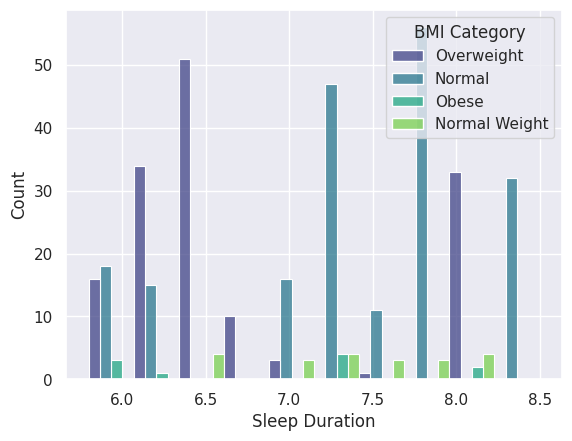

In [ ]:
sns.histplot(data=dataset, x=dataset['Sleep Duration'], hue="BMI Category", palette="viridis", multiple="dodge")

### Age

<Axes: xlabel='Age', ylabel='Count'>

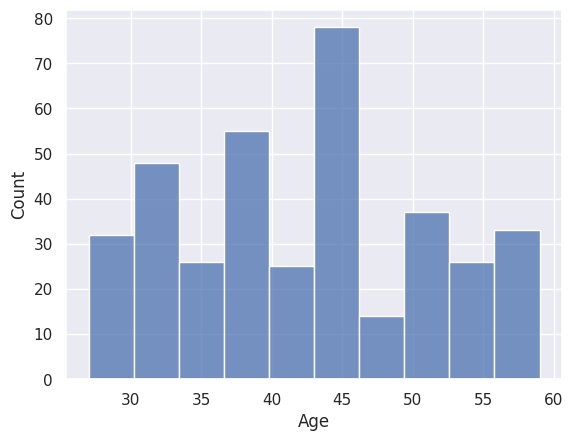

In [30]:
sns.histplot(dataset['Age'], palette='viridis')

<Axes: xlabel='Age', ylabel='Count'>

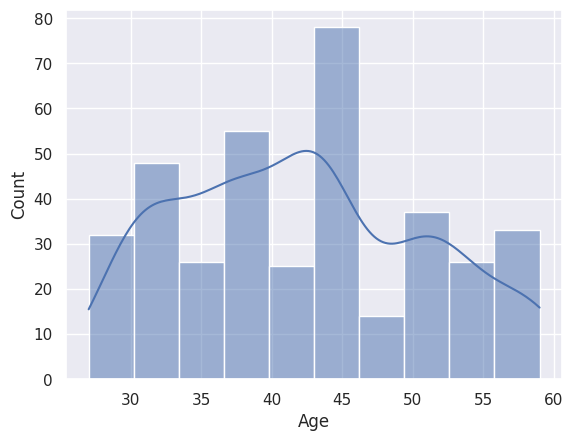

In [31]:
sns.histplot(dataset['Age'], palette='viridis', kde=True)

#### Age / Gender Box Plot

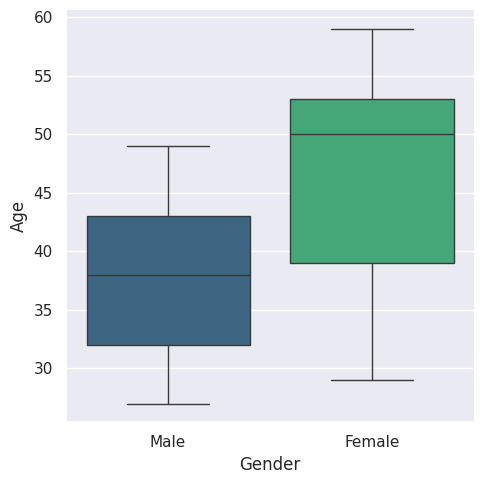

In [32]:
sns.catplot(kind='box',
           data=dataset,
           x='Gender', y='Age', palette="viridis")

#### Violin plot

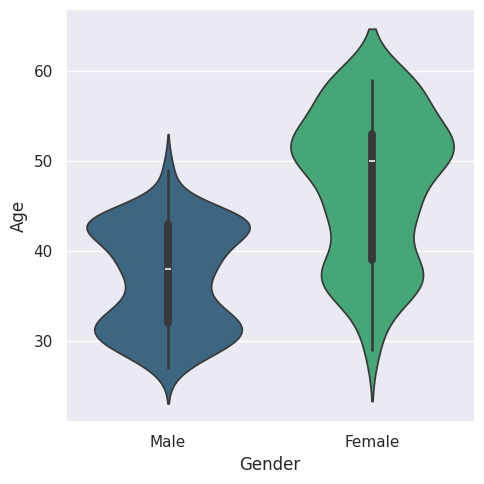

In [33]:
sns.catplot(kind="violin", data=dataset, x="Gender", y = "Age", palette="viridis")

#### Strip plot

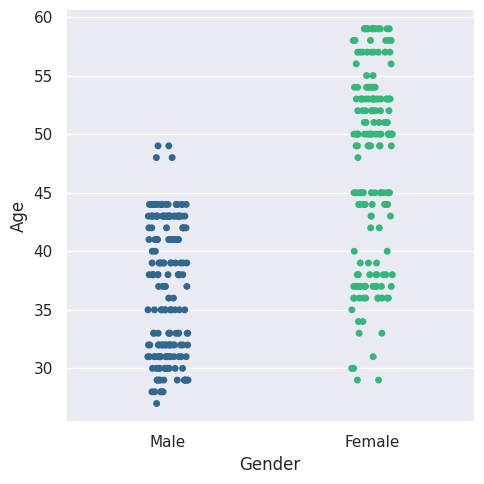

In [34]:
sns.catplot(kind="strip", data=dataset, x="Gender", y="Age", palette="viridis")

#### Scatter Plot Age / Sleep Duration (BMI Category)

<Axes: xlabel='Age', ylabel='Sleep Duration'>

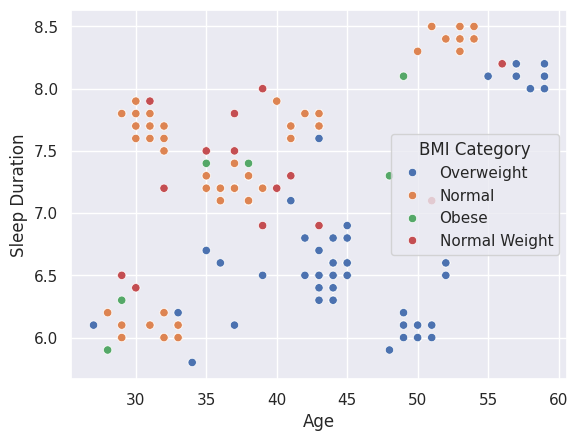

In [35]:
sns.scatterplot(data = dataset, x="Age", y="Sleep Duration", hue="BMI Category")

### Occupation

In [36]:
occupation_unique = dataset['Occupation'].unique()
occupation_counts = dataset['Occupation'].value_counts()
print(occupation_unique)
print(occupation_counts)

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

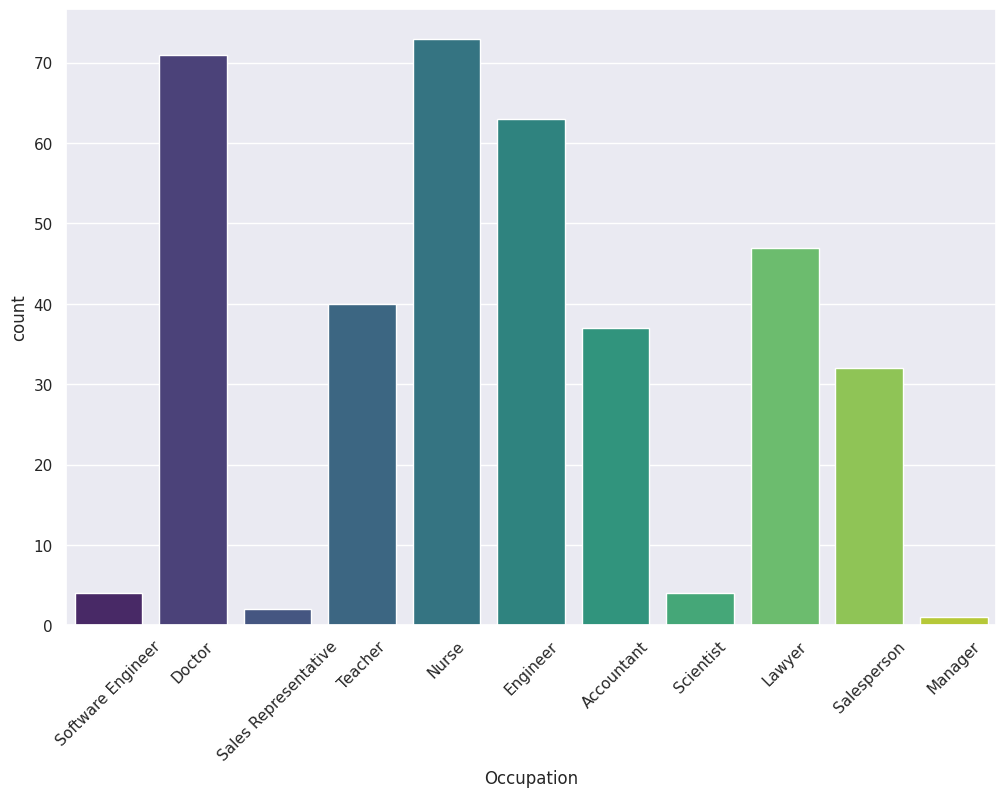

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(data=dataset, x='Occupation', palette="viridis")
plt.xticks(rotation=45)

#### Occupation / Sleep Duration

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

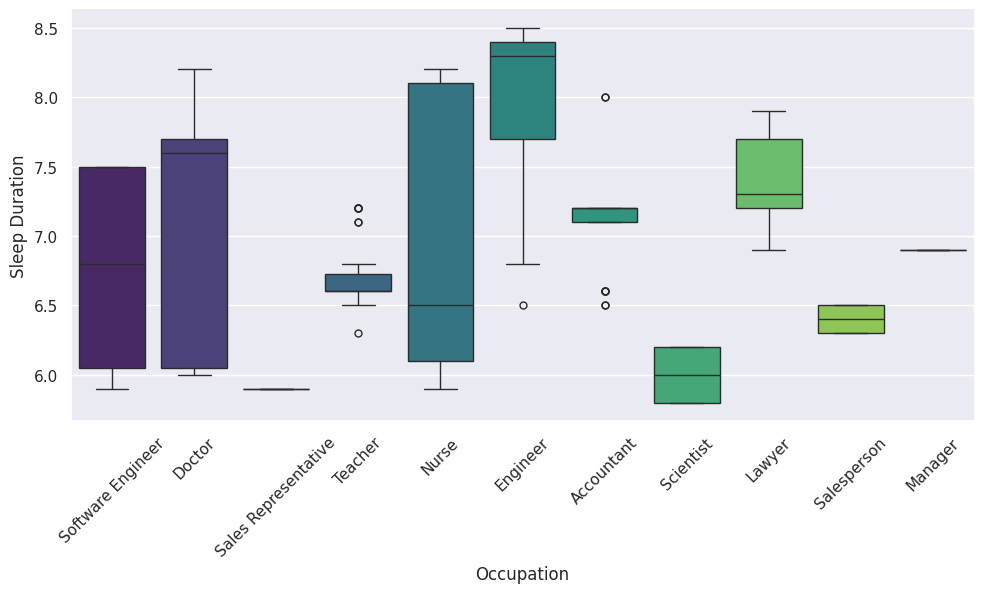

In [38]:
sns.catplot(kind='box',
           data=dataset,
           x='Occupation', y='Sleep Duration', palette="viridis", aspect=2)
plt.xticks(rotation=45)

### BMI Category

In [39]:
bmi_category_unique = dataset['BMI Category'].unique()
bmi_category_counts = dataset['BMI Category'].value_counts()
print(bmi_category_unique)
print(bmi_category_counts)

['Overweight' 'Normal' 'Obese' 'Normal Weight']
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


<Axes: xlabel='BMI Category', ylabel='count'>

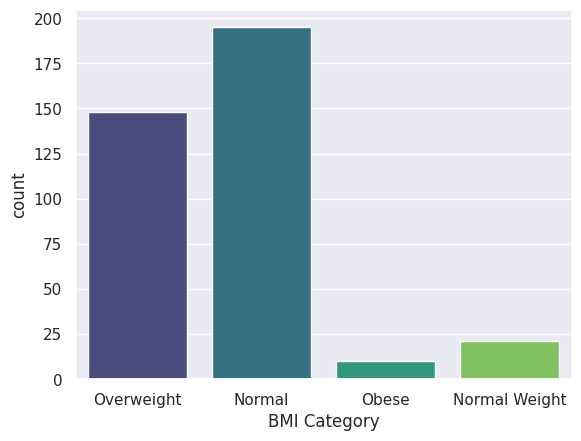

In [40]:
sns.countplot(data=dataset, x='BMI Category', palette="viridis")

([0, 1, 2, 3],
 [Text(0, 0, 'Overweight'),
  Text(1, 0, 'Normal'),
  Text(2, 0, 'Obese'),
  Text(3, 0, 'Normal Weight')])

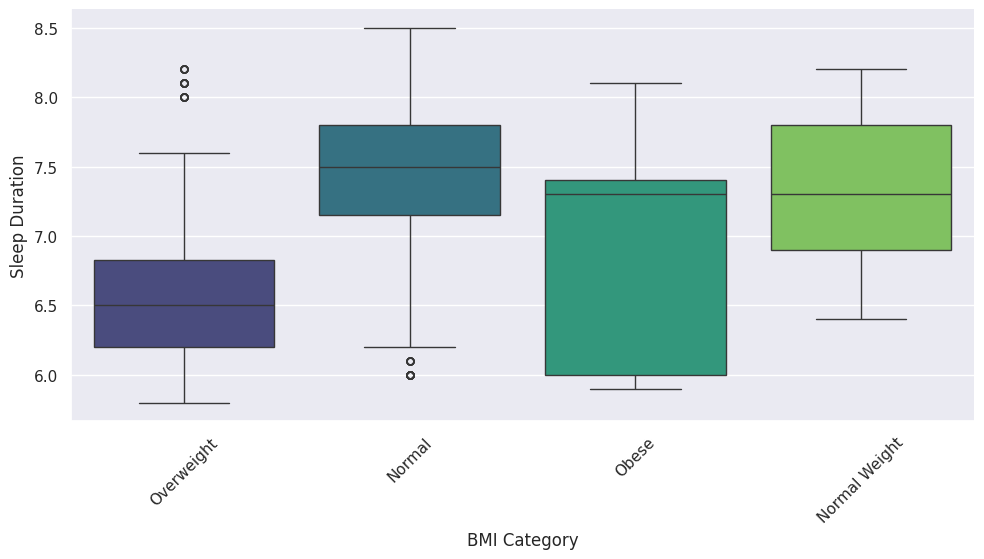

In [42]:
sns.catplot(kind='box',
           data=dataset,
           x='BMI Category', y='Sleep Duration', palette="viridis", aspect=2)
plt.xticks(rotation=45)

### Blood Pressure

In [43]:
blood_pressure_unique = dataset['Blood Pressure'].unique()
blood_pressure_counts = dataset['Blood Pressure'].value_counts()
print(blood_pressure_unique)
print(blood_pressure_counts)

['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
128/85     3
132/87     3
117/76     2
130/86     2
126/83     2
119/77     2
135/88     2
128/84     2
131/86     2
139/91     2
115/78     2
129/84     2
142/92     2
118/75     2
118/76     1
122/80     1
121/79     1
Name: count, dtype: int64


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '126/83'),
  Text(1, 0, '125/80'),
  Text(2, 0, '140/90'),
  Text(3, 0, '120/80'),
  Text(4, 0, '132/87'),
  Text(5, 0, '130/86'),
  Text(6, 0, '117/76'),
  Text(7, 0, '118/76'),
  Text(8, 0, '128/85'),
  Text(9, 0, '131/86'),
  Text(10, 0, '128/84'),
  Text(11, 0, '115/75'),
  Text(12, 0, '135/88'),
  Text(13, 0, '129/84'),
  Text(14, 0, '130/85'),
  Text(15, 0, '115/78'),
  Text(16, 0, '119/77'),
  Text(17, 0, '121/79'),
  Text(18, 0, '125/82'),
  Text(19, 0, '135/90'),
  Text(20, 0, '122/80'),
  Text(21, 0, '142/92'),
  Text(22, 0, '140/95'),
  Text(23, 0, '139/91'),
  Text(24, 0, '118/75')])

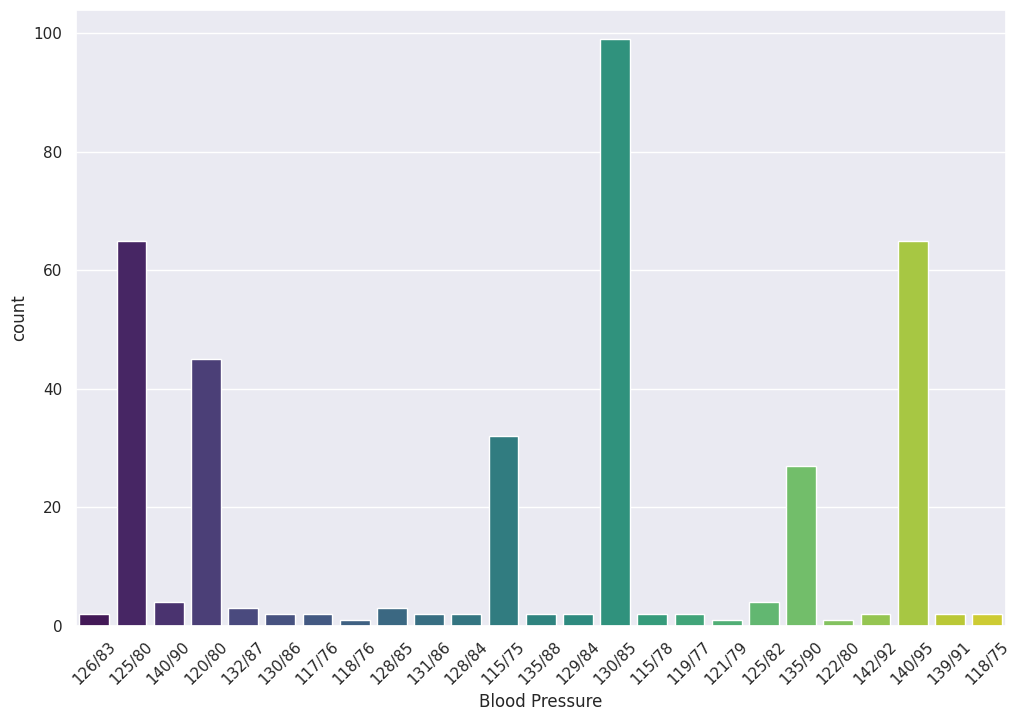

In [44]:
plt.figure(figsize=(12,8))
sns.countplot(data=dataset, x='Blood Pressure', palette="viridis")
plt.xticks(rotation=45)

### Sleep Disorder

In [45]:
disorders_unique = dataset['Sleep Disorder'].unique()
disorders_counts = dataset['Sleep Disorder'].value_counts()
print(disorders_unique)
print(disorders_counts)

['None' 'Sleep Apnea' 'Insomnia']
Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


<Axes: xlabel='Sleep Disorder', ylabel='count'>

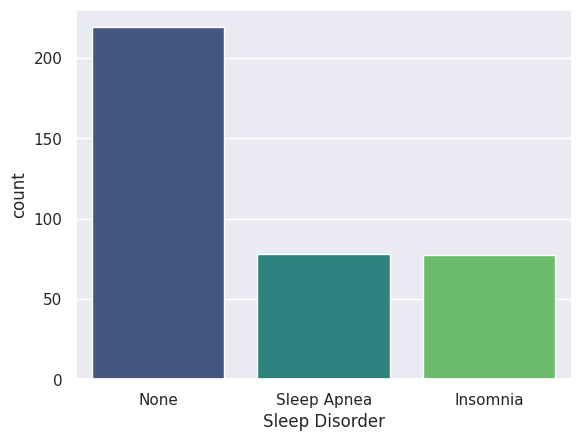

In [46]:
sns.countplot(data=dataset, x='Sleep Disorder', palette="viridis")

#### Sleep Disorder / Gender

In [47]:
sleep_disorder_genders = dataset.groupby(['Sleep Disorder'])['Gender'].value_counts()
print(sleep_disorder_genders)

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64


<Axes: xlabel='Sleep Disorder', ylabel='count'>

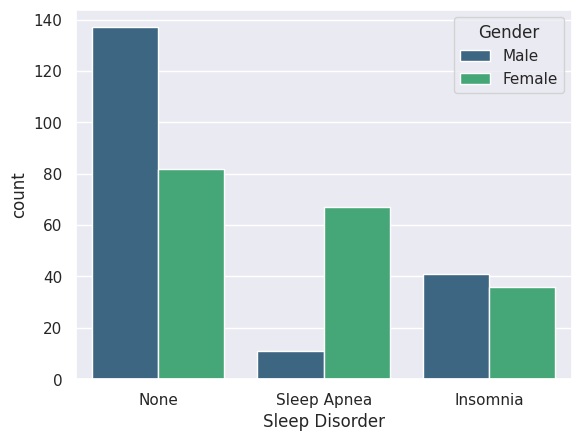

In [48]:
sns.countplot(data=dataset, x='Sleep Disorder', hue='Gender', palette="viridis")

#### Sleep Disorder / Occupation

<Axes: xlabel='Sleep Disorder', ylabel='count'>

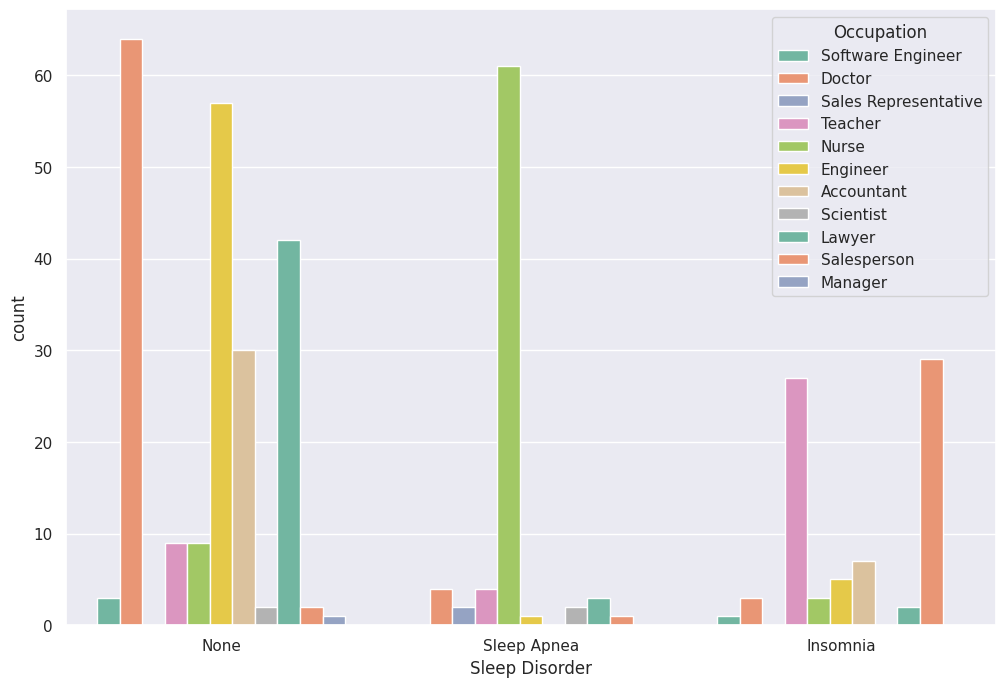

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(data=dataset, x='Sleep Disorder', hue='Occupation', palette='Set2')

### Physical Activity

<Axes: xlabel='Physical Activity Level', ylabel='Count'>

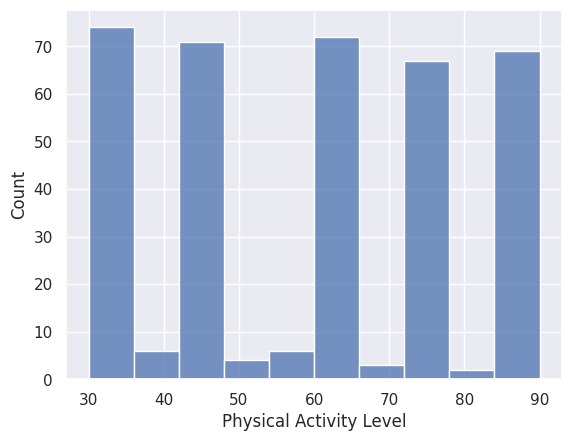

In [50]:
sns.histplot(dataset['Physical Activity Level'], palette="viridis")

#### Physical Activity / Gender

([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

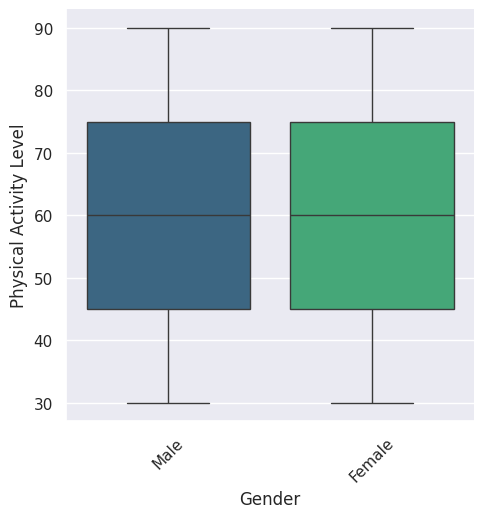

In [52]:
sns.catplot(kind='box',
           data=dataset,
           x='Gender', y='Physical Activity Level', palette="viridis")
plt.xticks(rotation=45)

### Sleep Quality

<Axes: xlabel='Quality of Sleep', ylabel='Count'>

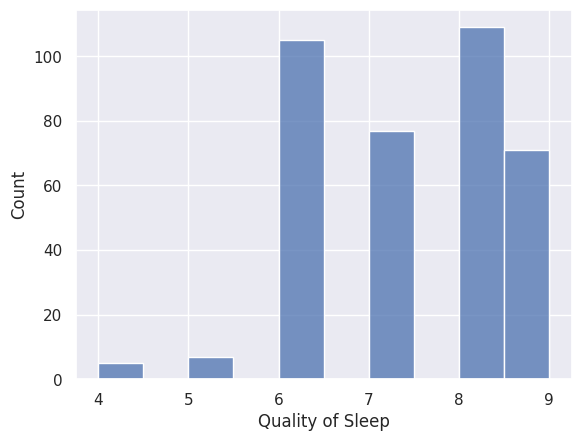

In [53]:
sns.histplot(dataset['Quality of Sleep'], palette="viridis")

#### Sleep Quality / Sleep Disorder

In [54]:
sleep_quality_disorders = dataset.groupby(['Sleep Disorder'])['Quality of Sleep'].value_counts()
print(sleep_quality_disorders)

Sleep Disorder  Quality of Sleep
Insomnia        7                    34
                6                    32
                8                     5
                5                     4
                4                     1
                9                     1
None            8                   101
                6                    40
                7                    40
                9                    38
Sleep Apnea     6                    33
                9                    32
                4                     4
                5                     3
                7                     3
                8                     3
Name: count, dtype: int64


<Axes: xlabel='Sleep Disorder', ylabel='count'>

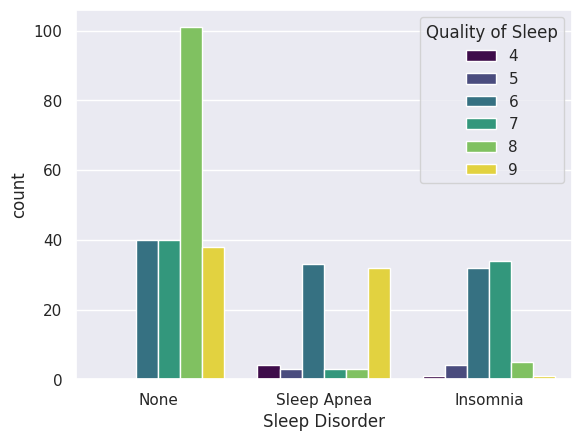

In [55]:
sns.countplot(data=dataset, x='Sleep Disorder', hue='Quality of Sleep', palette="viridis")

### Stress level

In [56]:
dataset['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

<Axes: xlabel='Stress Level', ylabel='Count'>

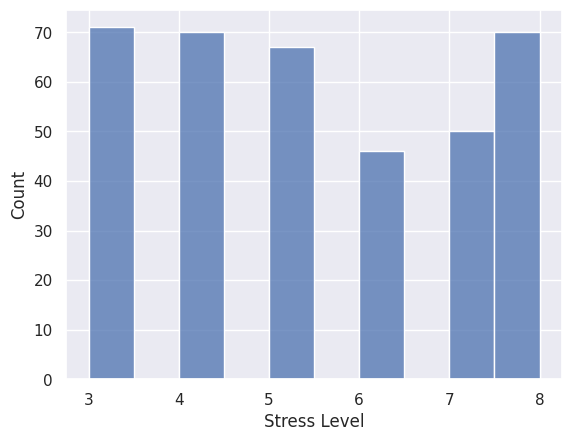

In [57]:
sns.histplot(dataset['Stress Level'], palette="viridis")

#### Stress level / Sleep Disorder

<Axes: xlabel='Stress Level', ylabel='Count'>

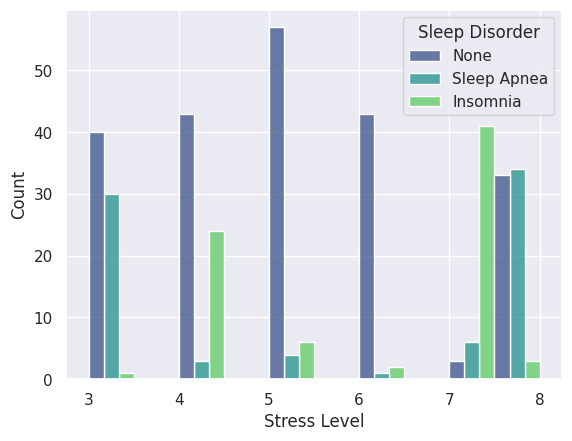

In [58]:
sns.histplot(data=dataset, x=dataset['Stress Level'], hue='Sleep Disorder', palette="viridis", multiple="dodge")

([0, 1, 2],
 [Text(0, 0, 'None'), Text(1, 0, 'Sleep Apnea'), Text(2, 0, 'Insomnia')])

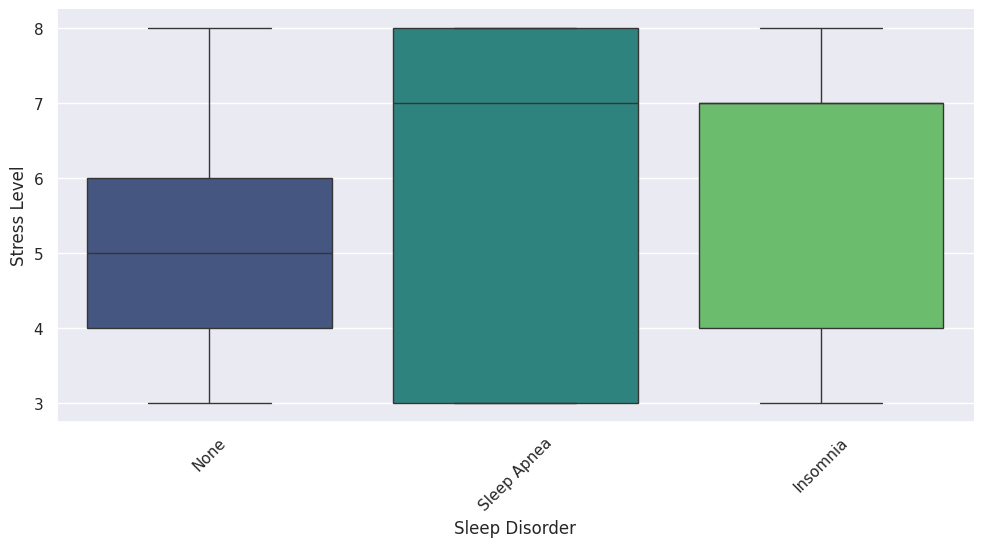

In [59]:
sns.catplot(kind='box',
           data=dataset,
           x='Sleep Disorder', y='Stress Level', palette="viridis", aspect=2)
plt.xticks(rotation=45)

## Data Preprocessing

In [ ]:
dataset.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
dataset[['Upper Blood Pressure', 'Lower Blood Pressure']] = dataset['Blood Pressure'].str.split("/", expand=True)

In [ ]:
dataset = dataset.drop('Blood Pressure', axis=1)

In [ ]:
# dataset = pd.concat([dataset, dataset['Blood Pressure'].str.split("/", expand=True)], axis=1).drop('Blood Pressure')

In [ ]:
dataset['Upper Blood Pressure'] = dataset['Upper Blood Pressure'].astype('float')
dataset['Lower Blood Pressure'] = dataset['Lower Blood Pressure'].astype('float')

In [ ]:
dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper Blood Pressure,Lower Blood Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset_preprocessed = dataset.copy()
encoder = LabelEncoder()

for col in ['Gender', 'BMI Category', 'Occupation', 'Sleep Disorder']:
  dataset[col] = encoder.fit_transform(dataset[col])

In [ ]:
dataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Upper Blood Pressure,Lower Blood Pressure
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0


In [ ]:
dataset = dataset.drop('Person ID', axis=1)

### Data correlations

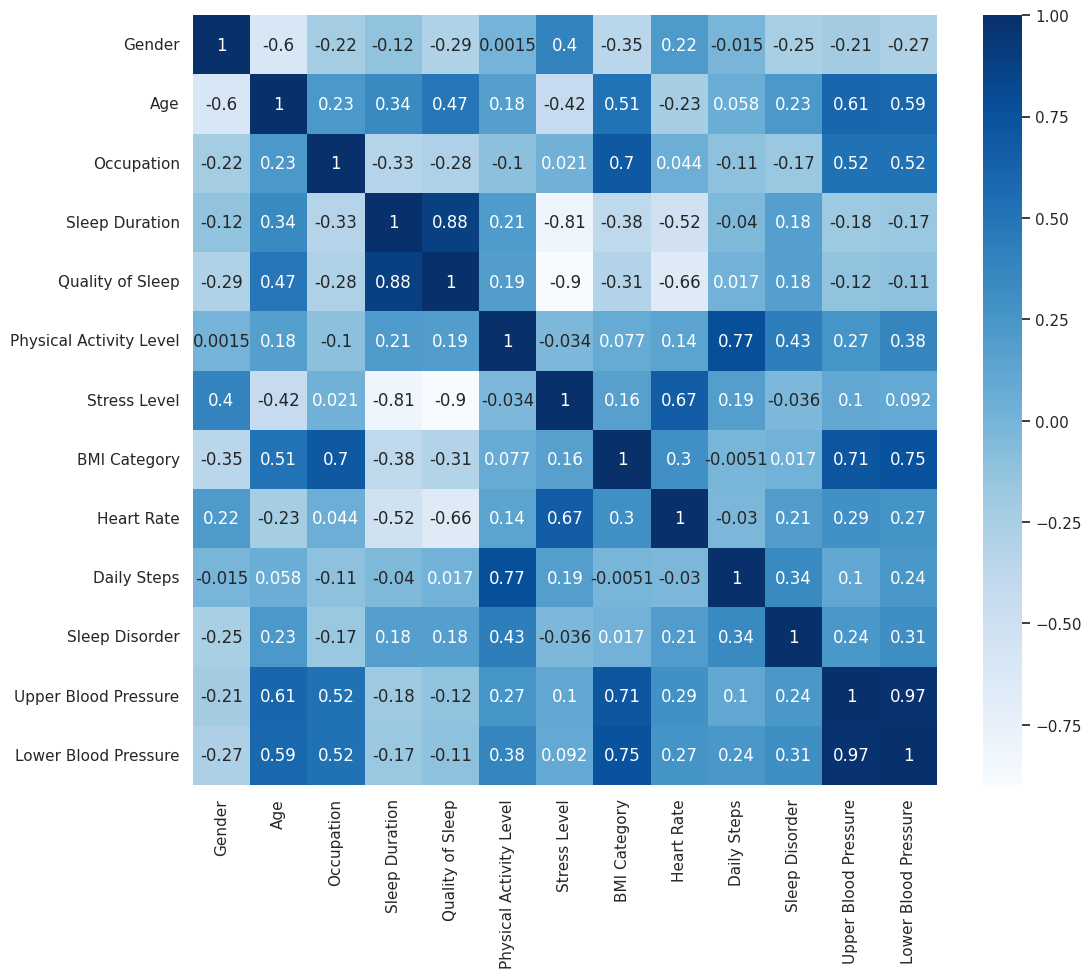

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(dataset.corr(), annot=True,cmap ='Blues')

### Outliers removal

In [ ]:
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'Upper Blood Pressure', 'Lower Blood Pressure']

In [ ]:
Q1 = dataset[num_col].quantile(0.25)
Q3 = dataset[num_col].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

,0
Age,14.75
Sleep Duration,1.40
Quality of Sleep,2.00
Physical Activity Level,30.00
Stress Level,3.00
Heart Rate,4.00
Daily Steps,2400.00
Upper Blood Pressure,10.00
Lower Blood Pressure,10.00


In [ ]:
dataset = dataset[~((dataset[num_col] < (Q1 - 1.5 * IQR)) | (dataset[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
Q1 = dataset[num_col].quantile(0.25)
Q3 = dataset[num_col].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

,0
Age,14.00
Sleep Duration,1.35
Quality of Sleep,2.00
Physical Activity Level,30.00
Stress Level,3.00
Heart Rate,4.00
Daily Steps,2000.00
Upper Blood Pressure,10.00
Lower Blood Pressure,10.00


### Creating different age groups (Categories)

In [ ]:
dataset['Age group'] = pd.cut(dataset['Age'], [20, 30, 40, 50, 60], labels=['20s', '30s', '40s', '50s'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   359 non-null    int64   
 1   Age                      359 non-null    int64   
 2   Occupation               359 non-null    int64   
 3   Sleep Duration           359 non-null    float64 
 4   Quality of Sleep         359 non-null    int64   
 5   Physical Activity Level  359 non-null    int64   
 6   Stress Level             359 non-null    int64   
 7   BMI Category             359 non-null    int64   
 8   Heart Rate               359 non-null    int64   
 9   Daily Steps              359 non-null    int64   
 10  Sleep Disorder           359 non-null    int64   
 11  Upper Blood Pressure     359 non-null    float64 
 12  Lower Blood Pressure     359 non-null    float64 
 13  Age group                359 non-null    category
dtypes: category(1),

#### Box plot Age groups / Sleep Duration

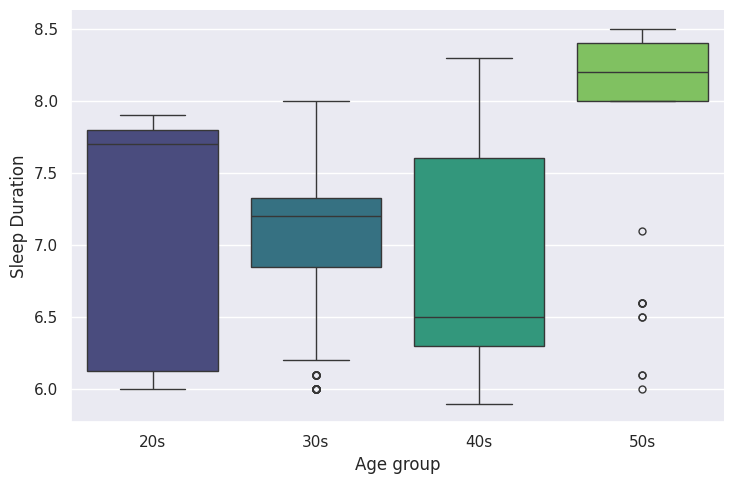

In [ ]:
sns.catplot(data=dataset, kind='box', x='Age group', y='Sleep Duration', palette='viridis', aspect=1.5, height=5)

## Bilding ML pipeline

In [ ]:
X = dataset.drop('Sleep Disorder', axis=1)
X.drop(['Age group'], axis=1, inplace=True)

y = dataset['Sleep Disorder']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

In [ ]:
param_grid = [
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [100, 200, 300,400],
        'clf__max_depth': [None, 5, 10,15],
    },
    {
        'clf': [SVC()],
        'clf__kernel': ['linear', 'rbf'],
        'clf__C': [0.01,0.1, 1, 10],
    },
    {
        'clf': [LogisticRegression()],
        'clf__solver': ['liblinear', 'lbfgs'],
        'clf__C': [0.01,0.1, 1, 10],
    },
    {
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [3, 5, 7,9],
    },
    {
        'clf': [GradientBoostingClassifier()],
        'clf__n_estimators': [100, 200, 300,400],
        'clf__learning_rate': [0.01, 0.1, 1],
    },
    {
        'clf': [DecisionTreeClassifier()],
        'clf__max_depth': [None, 5, 10,15],
    }
]

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', RandomForestClassifier())]),
             param_grid=[{'clf': [RandomForestClassifier()],
                          'clf__max_depth': [None, 5, 10, 15],
                          'clf__n_estimators': [100, 200, 300, 400]},
                         {'clf': [SVC()], 'clf__C': [0.01, 0.1, 1, 10],
                          'clf__kernel': ['linear', 'rbf']},
                         {'clf': [LogisticRegression()],
                          'clf__C': [0.01, 0.1, 1, 10],
                          'clf__solver': ['liblinear', 'lbfgs']},
                         {'clf': [KNeighborsClassifier()],
                          'clf__n_neighbors': [3, 5, 7, 9]},
                         {'clf': [GradientBoostingClassifier()],
                          'clf__learning_rate': [0.01, 0.1, 1],
                          'clf__n_estimators': [100, 200, 300, 400]},
                         {'clf': [DecisionTreeClassifier()],
                          'clf__max_depth': [None, 5, 10, 15]}])

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

In [ ]:
model_names = [name for name, _ in models]

In [ ]:
accuracy_scores = []

In [ ]:
accuracy_scores

[]

In [ ]:
for name, model in models:
  pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'Logistic Regression'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Gradient Boosting'),
  Text(5, 0, 'Decision Tree')])

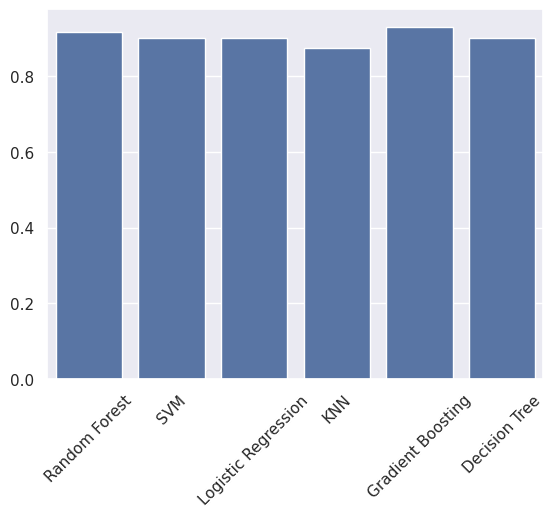

In [ ]:
sns.barplot(x=model_names, y=accuracy_scores)
plt.xticks(rotation=45)

In [ ]:
for model_name, score in zip(model_names, accuracy_scores):
  print(f"Model:{model_name} - Score:{round(score,3 )}")

Model:Random Forest - Score:0.917
Model:SVM - Score:0.903
Model:Logistic Regression - Score:0.903
Model:KNN - Score:0.875
Model:Gradient Boosting - Score:0.931
Model:Decision Tree - Score:0.903


In [ ]:
importance = best_model.named_steps['clf'].feature_importances_
feature_names = X.columns

In [ ]:
sorted_indices = np.argsort(importance)[::-1]

In [ ]:
sorted_indices

array([ 7, 11, 10,  2,  1,  3,  5,  9,  8,  4,  6,  0])

In [ ]:
sorted_importance = importance[sorted_indices]

In [ ]:
sorted_features = feature_names[sorted_indices]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'BMI Category'),
  Text(1, 0, 'Lower Blood Pressure'),
  Text(2, 0, 'Upper Blood Pressure'),
  Text(3, 0, 'Occupation'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'Sleep Duration'),
  Text(6, 0, 'Physical Activity Level'),
  Text(7, 0, 'Daily Steps'),
  Text(8, 0, 'Heart Rate'),
  Text(9, 0, 'Quality of Sleep'),
  Text(10, 0, 'Stress Level'),
  Text(11, 0, 'Gender')])

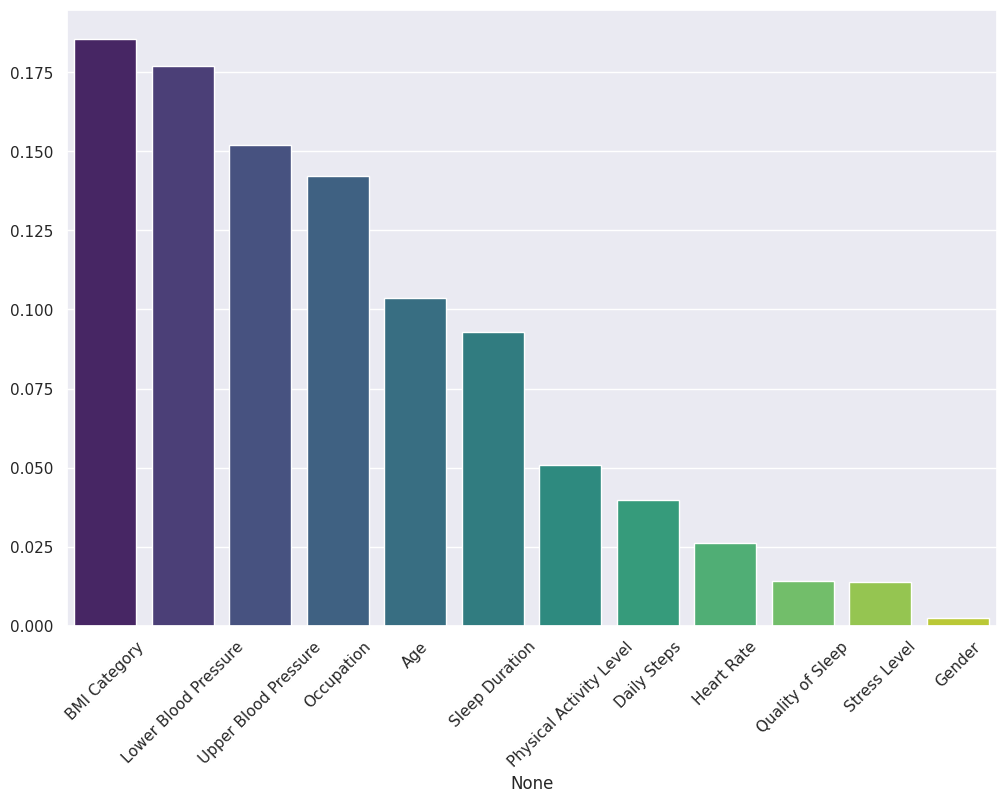

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_features, y=sorted_importance, palette='viridis')
plt.xticks(rotation=45)